In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import os

In [2]:
train_path = "TRAIN.csv"

In [3]:
# importing training dataset
train_data = pd.read_csv(train_path, index_col="Index")

In [4]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [5]:
# check for null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284455 entries, 0 to 284454
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284455 non-null  float64
 1   V2      284455 non-null  float64
 2   V3      284455 non-null  float64
 3   V4      284455 non-null  float64
 4   V5      284455 non-null  float64
 5   V6      284455 non-null  float64
 6   V7      284455 non-null  float64
 7   V8      284455 non-null  float64
 8   V9      284455 non-null  float64
 9   V10     284455 non-null  float64
 10  V11     284455 non-null  float64
 11  V12     284455 non-null  float64
 12  V13     284455 non-null  float64
 13  V14     284455 non-null  float64
 14  V15     284455 non-null  float64
 15  V16     284455 non-null  float64
 16  V17     284455 non-null  float64
 17  V18     284455 non-null  float64
 18  V19     284455 non-null  float64
 19  V20     284455 non-null  float64
 20  V21     284455 non-null  float64
 21  V22     28

In [6]:
# Checking the target variable to check how imbalanced the dataset is
train_data['Class'].value_counts()

0    284015
1       440
Name: Class, dtype: int64

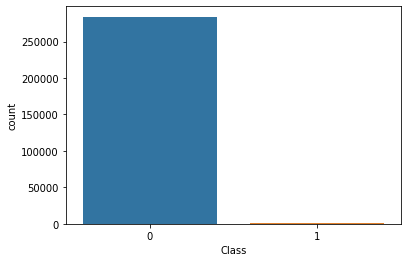

In [7]:
sns.countplot(x=train_data['Class'], data=train_data)

In [8]:
train_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,...,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,0.000948,...,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,1.085083,...,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,-0.535273,...,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,-0.092820,...,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,0.454005,...,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
# checking the coorelation of each attribute with taget value (i.e Class)
train_data.corrwith(train_data['Class']).sort_values()

V17      -0.312714
V14      -0.287015
V12      -0.249538
V10      -0.207321
V16      -0.186621
V3       -0.183220
V7       -0.180110
V18      -0.105902
V1       -0.096373
V9       -0.093588
V5       -0.089295
V6       -0.041521
V24      -0.006572
V13      -0.004318
V15      -0.003658
V23      -0.002535
V25       0.001242
V22       0.002137
V26       0.004224
Amount    0.004730
V28       0.008279
V8        0.015590
V27       0.015708
V20       0.019624
V19       0.032968
V21       0.035185
V2        0.086505
V4        0.127422
V11       0.147121
Class     1.000000
dtype: float64

In [10]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,,,,,,,,,,,,,,,,,,,,,
83240,1.170989,0.358556,0.600999,1.039162,-0.332777,-0.666270,0.085680,-0.114773,-0.377000,0.133601,...,0.024906,0.107069,-0.022058,0.545574,0.518807,-0.472299,0.025261,0.020174,6.95,0
90918,-1.355173,0.104414,0.512322,3.301420,0.394145,-0.952893,0.056829,0.424802,-1.436598,0.782577,...,0.219059,0.012383,0.227566,0.368678,-0.354682,0.155401,0.206506,-0.093000,100.00,0
40024,1.133777,-0.205247,1.500638,0.677824,-1.414620,-0.623858,-0.762267,0.033470,0.707663,-0.128731,...,0.255411,0.750552,-0.009652,0.770197,0.140914,0.554087,0.011052,0.038172,28.19,0
56363,-0.178296,0.578793,1.112152,1.473092,-0.249579,0.159411,0.653870,0.144592,-0.842210,0.171671,...,0.276544,0.666049,0.152203,0.208250,-0.370426,-0.166654,0.103641,0.077747,101.45,0
133231,-1.547804,1.951166,0.233055,2.163722,0.148759,1.527460,0.622291,0.526813,-0.770528,2.217548,...,-0.075841,0.408306,-0.227236,-1.344376,-0.046011,0.347623,0.613256,0.179167,111.88,0


In [11]:
# splitting attributes and labels

X = train_data.drop(['Class'], axis=1)
y = train_data['Class']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))
X_scaled

array([[ 0.59822345,  0.21776745,  0.39700429, ...,  0.0626978 ,
         0.06119357, -0.32540776],
       [-0.69317611,  0.0637637 ,  0.33830207, ...,  0.51189589,
        -0.28162531,  0.04652841],
       [ 0.57920034, -0.123883  ,  0.99254527, ...,  0.02748253,
         0.11571191, -0.24050799],
       ...,
       [ 0.04643288, -1.08584832,  0.46847658, ..., -0.0828605 ,
         0.36022203,  1.7904514 ],
       [-2.66412919,  2.38242615, -2.51707531, ...,  0.56557192,
        -0.09233599, -0.35122945],
       [ 0.48773062, -0.43674569,  0.96089309, ...,  0.2024892 ,
         0.13955278,  0.03713508]])

In [13]:
# Using SMOTE reseampling method to balance the dataset
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_scaled, y)

In [14]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 284015), (1, 284015)]


In [15]:
# trying out algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [16]:
# Cross validate the dataset to prevent overfitting and select the best algorithm
from sklearn.model_selection import cross_val_score, cross_val_predict

In [17]:
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)
sgd_clf.fit(X_resampled, y_resampled)
sgd_score = cross_val_score(sgd_clf, X_resampled, y_resampled, cv=3, scoring="accuracy")
print(sgd_score)
print(sgd_score.mean())

[0.94903456 0.948691   0.9484058 ]
0.9487104548631118


In [18]:
#calculating stats for comparision of algorithms
y_pred = cross_val_predict(sgd_clf, X_resampled, y_resampled, cv=3)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print("CONFUSION MATRIX:")
print(confusion_matrix(y_resampled, y_pred))
print("\nPRECISION SCORE: ", precision_score(y_resampled, y_pred))
print("\nRECALL SCORE: ", recall_score(y_resampled, y_pred))
print("\nF1 SCORE: ", f1_score(y_resampled, y_pred))
print("\nROC_AUC_SCORE: ", roc_auc_score(y_resampled, y_pred))

CONFUSION MATRIX:
[[276864   7151]
 [ 21983 262032]]

PRECISION SCORE:  0.9734344293658961

RECALL SCORE:  0.92259915849515

F1 SCORE:  0.9473353121305572

ROC_AUC_SCORE:  0.9487104554336918


In [19]:
forest_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
forest_clf_score = cross_val_score(forest_clf, X_resampled, y_resampled, cv=3, scoring='accuracy')
print(forest_clf_score)
print(forest_clf_score.mean())

[0.99990493 0.9998574  0.99989965]
0.9998873298635546


In [20]:
y_pred = cross_val_predict(forest_clf, X_resampled, y_resampled, cv=3)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print("CONFUSION MATRIX:")
print(confusion_matrix(y_resampled, y_pred))
print("\nPRECISION SCORE: ", precision_score(y_resampled, y_pred))
print("\nRECALL SCORE: ", recall_score(y_resampled, y_pred))
print("\nF1 SCORE: ", f1_score(y_resampled, y_pred))
print("\nROC_AUC_SCORE: ", roc_auc_score(y_resampled, y_pred))

CONFUSION MATRIX:
[[283955     60]
 [     0 284015]]

PRECISION SCORE:  0.9997887881721377

RECALL SCORE:  1.0

F1 SCORE:  0.9998943829322818

ROC_AUC_SCORE:  0.9998943717761386


In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf_scores = cross_val_score(knn_clf, X_resampled, y_resampled, cv=3, scoring='accuracy')
print(knn_clf_scores)
print(knn_clf_scores.mean())

In [ ]:
y_pred = cross_val_predict(svc, X_resampled, y_resampled, cv=3)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print("CONFUSION MATRIX:")
print(confusion_matrix(y_resampled, y_pred))
print("\nPRECISION SCORE: ", precision_score(y_resampled, y_pred))
print("\nRECALL SCORE: ", recall_score(y_resampled, y_pred))
print("\nF1 SCORE: ", f1_score(y_resampled, y_pred))
print("\nROC_AUC_SCORE: ", roc_auc_score(y_resampled, y_pred))

In [ ]:
# training the best model
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc.fit(X_resampled,y_resampled)

In [ ]:
# Test data path
test_path = "TEST.csv"

In [ ]:
# Reading in the test dataset
test_data = pd.read_csv(test_path, index_col='Index')
test_data.index

# scaling the test dataset
x_test = scaler.transform(test_data)

In [ ]:
# Making predictions from the trained model
y_pred = rfc.predict(x_test)

In [ ]:
# Final Result
result = pd.DataFrame({"Index":test_dt.index, 'Class':y_pred})
result